This isolates all examples that contain a person's name, ignoring the other labels.

In [1]:
from datasets import load_dataset
from dotenv import load_dotenv
from pathlib import Path

if Path("../.env").exists():
    print("Loaded .env file!")
    load_dotenv("../.env")

sds = load_dataset("DFKI-SLT/few-nerd", "supervised")
interds = load_dataset("DFKI-SLT/few-nerd", "inter")
intrads = load_dataset("DFKI-SLT/few-nerd", "intra")

Loaded .env file!


Generating train split:   0%|          | 0/131767 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/18824 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/37648 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/130112 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/18817 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/14007 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/99519 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/19358 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/44059 [00:00<?, ? examples/s]

In [2]:
person_id = sds["train"].features["ner_tags"].feature.str2int("person")

In [3]:
def filter_non_person(example):
    return person_id in example["ner_tags"]


sds = sds.filter(filter_non_person, num_proc=8)
interds = interds.filter(filter_non_person, num_proc=8)
intrads = intrads.filter(filter_non_person, num_proc=8)

Filter (num_proc=8):   0%|          | 0/131767 [00:00<?, ? examples/s]

Filter (num_proc=8):   0%|          | 0/18824 [00:00<?, ? examples/s]

Filter (num_proc=8):   0%|          | 0/37648 [00:00<?, ? examples/s]

Filter (num_proc=8):   0%|          | 0/130112 [00:00<?, ? examples/s]

Filter (num_proc=8):   0%|          | 0/18817 [00:00<?, ? examples/s]

Filter (num_proc=8):   0%|          | 0/14007 [00:00<?, ? examples/s]

Filter (num_proc=8):   0%|          | 0/99519 [00:00<?, ? examples/s]

Filter (num_proc=8):   0%|          | 0/19358 [00:00<?, ? examples/s]

Filter (num_proc=8):   0%|          | 0/44059 [00:00<?, ? examples/s]

In [4]:
from datasets import concatenate_datasets

ds = concatenate_datasets([sds["train"], interds["train"], intrads["train"]])
vds = concatenate_datasets([sds["validation"], interds["validation"], intrads["validation"]])
tds = concatenate_datasets([sds["test"], interds["test"], intrads["test"]])

In [5]:
df = ds.to_pandas()
vdf = vds.to_pandas()
tdf = tds.to_pandas()

In [6]:
import pandas as pd

df = pd.concat([df, vdf, tdf])

df

,id,tokens,ner_tags,fine_ner_tags
0,1,"[It, starred, Hicks, 's, wife, ,, Ellaline, Te...","[0, 0, 7, 0, 0, 0, 7, 7, 0, 7, 7, 0]","[0, 0, 51, 0, 0, 0, 50, 50, 0, 50, 50, 0]"
1,2,"[``, Time, ``, magazine, said, the, film, was,...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,12,"[Imelda, de, ', Lambertazzi, is, a, ``, melodr...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,17,"[In, 1783, Campbell, married, Olympia, Elizabe...","[0, 0, 7, 0, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 7, ...","[0, 0, 54, 0, 54, 54, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,18,"[Neville, performed, a, Spinning, Back, Kick, ...","[7, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0]","[52, 0, 0, 0, 0, 0, 0, 52, 0, 0, 0, 0, 0]"
...,...,...,...,...
15967,13987,"[Another, adaptation, -, written, ,, again, ,,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 0, 0..."
15968,13988,"[Infuriated, ,, the, director, immediately, fi...","[0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0,..."
15969,13989,"[Hines, Ward, got, the, Super, Bowl, MVP, reco...","[7, 7, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[52, 52, 0, 0, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0,..."
15970,13991,"[Brady, ended, the, 1973–74, season, with, 13,...","[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[52, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [7]:
df["text"] = ["".join(t) for t in df["tokens"]]

In [9]:
unq = set()


unq_label = []
for t in df["text"]:
    if t not in unq:
        unq_label.append(1)
        unq.add(t)
    else:
        unq_label.append(0)

In [10]:
df["unq"] = unq_label

In [11]:
df

,id,tokens,ner_tags,fine_ner_tags,text,unq
0,1,"[It, starred, Hicks, 's, wife, ,, Ellaline, Te...","[0, 0, 7, 0, 0, 0, 7, 7, 0, 7, 7, 0]","[0, 0, 51, 0, 0, 0, 50, 50, 0, 50, 50, 0]","ItstarredHicks'swife,EllalineTerrissandEdmundP...",1
1,2,"[``, Time, ``, magazine, said, the, film, was,...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",``Time``magazinesaidthefilmwas``amultimilliond...,1
2,12,"[Imelda, de, ', Lambertazzi, is, a, ``, melodr...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Imeldade'Lambertazziisa``melodrammatragico''or...,1
3,17,"[In, 1783, Campbell, married, Olympia, Elizabe...","[0, 0, 7, 0, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 7, ...","[0, 0, 54, 0, 54, 54, 0, 0, 0, 0, 0, 0, 0, 0, ...",In1783CampbellmarriedOlympiaElizabeth(died1794...,1
4,18,"[Neville, performed, a, Spinning, Back, Kick, ...","[7, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0]","[52, 0, 0, 0, 0, 0, 0, 52, 0, 0, 0, 0, 0]",NevilleperformedaSpinningBackKickonTozawatoret...,1
...,...,...,...,...,...,...
15967,13987,"[Another, adaptation, -, written, ,, again, ,,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 0, 0...","Anotheradaptation-written,again,byanactor:Mark...",0
15968,13988,"[Infuriated, ,, the, director, immediately, fi...","[0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0,...","Infuriated,thedirectorimmediatelyfiredPallette...",0
15969,13989,"[Hines, Ward, got, the, Super, Bowl, MVP, reco...","[7, 7, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[52, 52, 0, 0, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0,...",HinesWardgottheSuperBowlMVPrecording5catches14...,0
15970,13991,"[Brady, ended, the, 1973–74, season, with, 13,...","[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[52, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Bradyendedthe1973–74seasonwith13appearances(fo...,0


In [16]:
deduped = df[df["unq"] == 1]

deduped.shape

(54432, 6)

In [17]:
from datasets import Dataset

deduped_ds = Dataset.from_pandas(deduped.drop(columns=["unq", "text", "fine_ner_tags"]), preserve_index=False)

In [22]:
deduped_ds[0]

{'id': '1',
 'tokens': ['It',
  'starred',
  'Hicks',
  "'s",
  'wife',
  ',',
  'Ellaline',
  'Terriss',
  'and',
  'Edmund',
  'Payne',
  '.'],
 'ner_tags': [0, 0, 7, 0, 0, 0, 7, 7, 0, 7, 7, 0]}

In [23]:
deduped_ds.to_parquet("../data/fewnerd/persons.parquet")

Creating parquet from Arrow format:   0%|          | 0/55 [00:00<?, ?ba/s]

25524514

Let's pack the sequences together to make them longer

In [24]:
dds = deduped_ds.map(lambda x: {"length": len(x["tokens"])}, num_proc=4)

Map (num_proc=4):   0%|          | 0/54432 [00:00<?, ? examples/s]

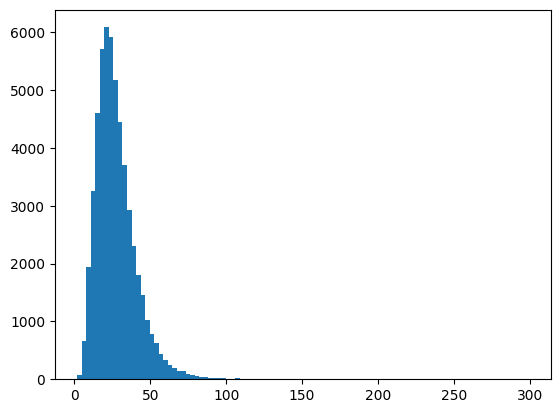

In [25]:
import matplotlib.pyplot as plt


plt.hist(dds["length"], bins=100);

In [28]:
from itertools import chain

max_seq_length = 100


def group_texts(examples):
    # Concatenate all texts.
    concatenated_examples = {k: list(chain(*examples[k])) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the small remainder, and if the total_length < max_seq_length  we exclude this batch and return an empty dict.
    # We could add padding if the model supported it instead of this drop, you can customize this part to your needs.
    total_length = (total_length // max_seq_length) * max_seq_length
    # Split by chunks of max_len.
    result = {
        k: [t[i : i + max_seq_length] for i in range(0, total_length, max_seq_length)]
        for k, t in concatenated_examples.items()
    }
    return result

dds = dds.remove_columns(["id", "length"]).map(group_texts, batched=True, batch_size=1000, num_proc=4, remove_columns=["ner_tags", "tokens"])

Map (num_proc=4):   0%|          | 0/54432 [00:00<?, ? examples/s]

In [30]:
dds

Dataset({
    features: ['tokens', 'ner_tags'],
    num_rows: 14919
})

In [ ]:
def convert_to_string_tags(example):
    mapper = {0: "O", 7: "PERSON"}
    example["ner_tags"] = [mapper.get(t, "O") for t in example["ner_tags"]]
    return example


dds = dds.map(convert_to_string_tags, num_proc=4)

In [2]:
# from datasets import Dataset

# dds = Dataset.from_parquet("../data/fewnerd/persons_grouped_into_100.parquet")

dds.to_parquet("../data/fewnerd/persons_grouped_into_100.parquet")

Generating train split: 0 examples [00:00, ? examples/s]